In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [32]:
data=pd.read_csv("C:/Users/Suleyman/Downloads/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Let's look at the statistical indicators

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


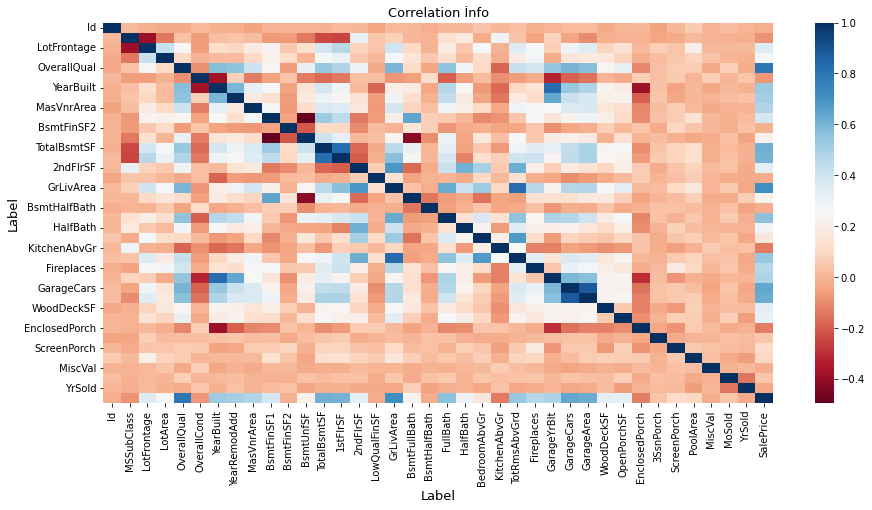

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap="RdBu");
plt.title("Correlation İnfo",size=13)
plt.xlabel("Label",size=13)
plt.ylabel("Label",size=13)
plt.show()

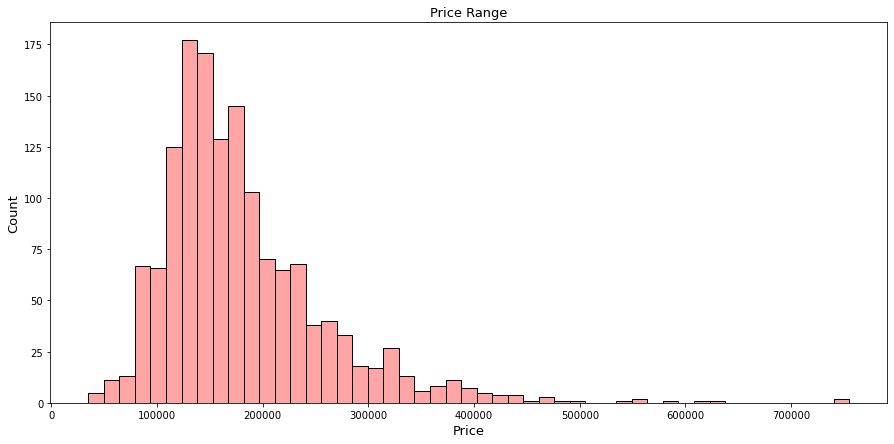

In [35]:
plt.figure(figsize=(15,7))
sns.histplot(data["SalePrice"],color="#FF8787")
plt.title("Price Range",size=13)
plt.xlabel("Price",size=13)
plt.ylabel("Count",size=13)
plt.show()

# Feature Selection

In [36]:
corr_data=list(data.corr()["SalePrice"][(data.corr()["SalePrice"]>0.50)|(data.corr()["SalePrice"]<-0.50)].index)
cat_data=["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
all_data=corr_data+cat_data
data=data[all_data]

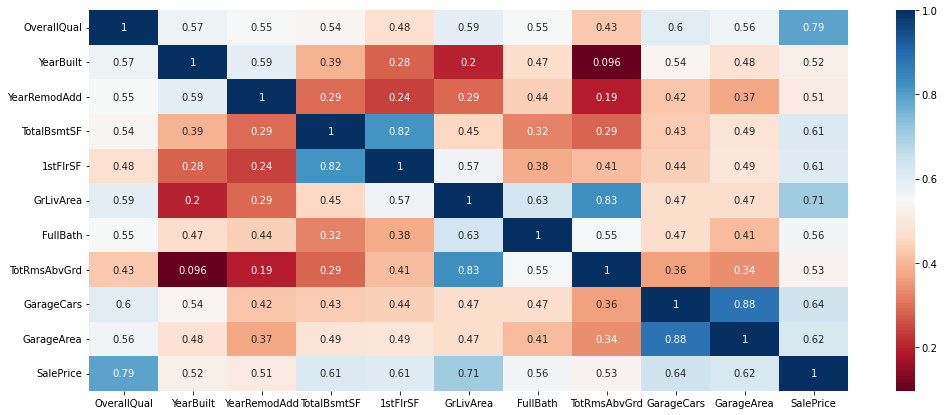

In [37]:
plt.figure(figsize=(17,7))
sns.heatmap(data.corr(),annot=True,cmap="RdBu");

# Check Null Data

Null Data 0


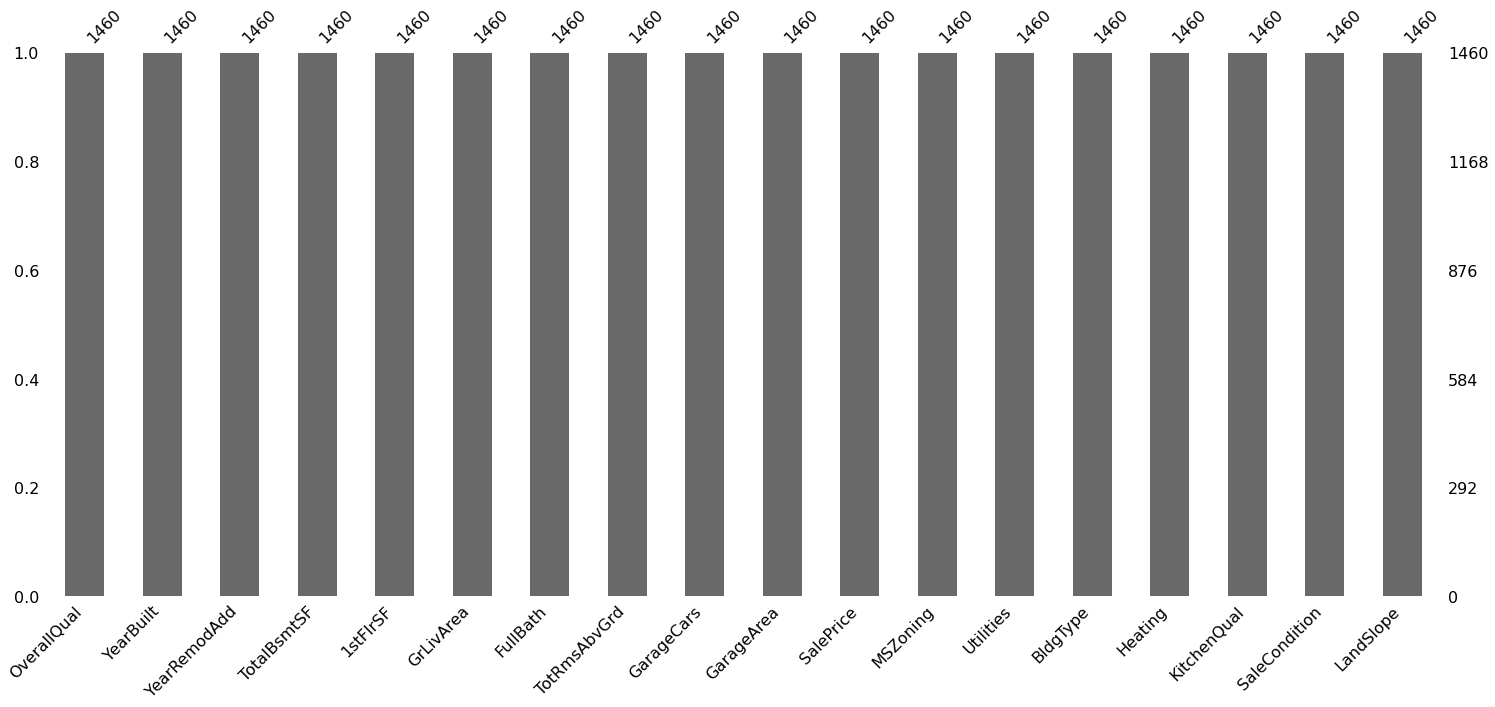

In [38]:
import missingno as msno
print("Null Data" ,data.isnull().sum().sum())
msno.bar(data)
plt.show()

# Check Outlier Values

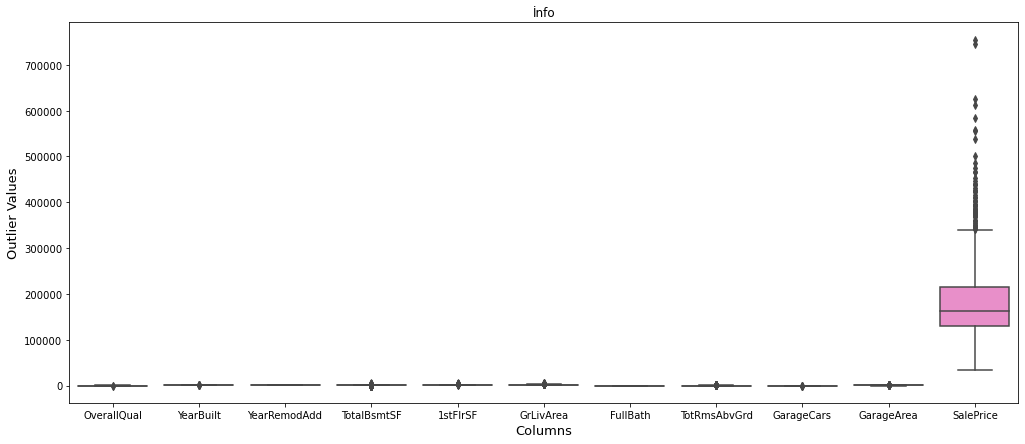

In [39]:
plt.figure(figsize=(17,7))
sns.boxplot(data=data);
plt.title("İnfo")
plt.ylabel("Outlier Values",size=13)
plt.xlabel("Columns",size=13);
# We see that there are outliers in the Price column
# To overcome this problem, it is necessary to use the IQR method

In [40]:
outlier=data["SalePrice"]
Q1=outlier.quantile(0.25)
Q3=outlier.quantile(0.75)
IQR=Q3-Q1
underoutlier=Q1-1.5*IQR
upperoutlier=Q3+1.5*IQR
#
under_border=(outlier<underoutlier)
upper_border=(outlier>upperoutlier)

In [41]:
outlier[under_border]=underoutlier
outlier[upper_border]=upperoutlier

C:\Users\Suleyman\AppData\Local\Temp/ipykernel_15524/3999476804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier[under_border]=underoutlier
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Suleyman\AppData\Local\Temp/ipykernel_15524/3999476804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier[upper_border]=upperout

In [42]:
withoutoutlier=pd.DataFrame(outlier)
withoutoutlierdata=pd.concat([data.drop("SalePrice",axis=1),withoutoutlier],axis=1)
withoutoutlierdata

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl,208500.0
1,6,1976,1976,1262,1262,1262,2,6,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl,181500.0
2,7,2001,2002,920,920,1786,2,6,2,608,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl,223500.0
3,7,1915,1970,756,961,1717,1,7,3,642,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl,140000.0
4,8,2000,2000,1145,1145,2198,2,9,3,836,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl,175000.0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl,210000.0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl,266500.0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl,142125.0


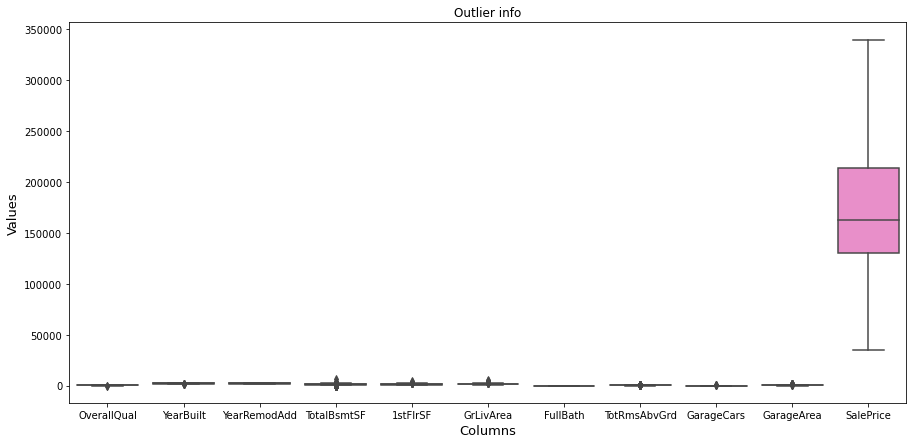

In [43]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=withoutoutlierdata)
plt.title("Outlier info")
plt.ylabel("Values",size=13)
plt.xlabel("Columns",size=13);

# Models

In [44]:
def rmse_cv(model):
    rmse=np.sqrt(-1*cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean()
    return rmse

def evaluation(y,predictions):
    rmse=np.sqrt(mean_squared_error(y,predictions))
    r2=r2_score(y,predictions)
    return rmse,r2

In [45]:
models = pd.DataFrame(columns=["Model","RMSE","R2","RMSE Cross Validation"])

# ML Models

In [46]:
X=withoutoutlierdata.drop("SalePrice",axis=1)
y=withoutoutlierdata["SalePrice"]
X=pd.get_dummies(X,columns=cat_data,drop_first=True)
corr_data.remove("SalePrice")
sc=StandardScaler()
X[corr_data]=sc.fit_transform(X[corr_data])
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=45)

# KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor().fit(X_train,y_train)
pred=knn_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(knn_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("RMSE Cross Validation:",cross_val)
new_info={"Model":"KNN","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)

RMSE: 28459.55168785643
R2: 0.8212434069466761
------------------------------
RMSE Cross Validation: 27123.444691857945


# SVR

In [48]:
from sklearn.svm import SVR
svr_model=SVR(kernel="rbf",C=100000).fit(X_train,y_train)
pred=svr_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(svr_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("RMSE Cross Validation:",cross_val)
new_info={"Model":"SVR","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)

RMSE: 25423.376770081184
R2: 0.8573497861414625
------------------------------
RMSE Cross Validation: 24974.317915799013


# Neural Network

In [49]:
from sklearn.neural_network import MLPRegressor
mlp_model=MLPRegressor().fit(X_train,y_train)
pred=svr_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(mlp_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("RMSE Cross Validation:",cross_val)
new_info={"Model":"MLP","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

RMSE: 25423.376770081184
R2: 0.8573497861414625
------------------------------
RMSE Cross Validation: 187639.48114307414


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# CART

In [50]:
from sklearn.tree import DecisionTreeRegressor
cart_model=DecisionTreeRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(knn_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"CART","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)

RMSE: 35203.385521736534
R2: 0.7264889837349677
------------------------------
Cross Validation: 27123.444691857945


# Bagged Trees

In [51]:
from sklearn.ensemble import BaggingRegressor
bagging_model=BaggingRegressor().fit(X_train,y_train)
pred=bagging_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(bagging_model)
print("RMSE:",rmse)
print("R2: ",r2)
print("Cross Validation:",cross_val)
new_info={"Model":"Bagged Tree","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)

RMSE: 27977.279856175242
R2:  0.8272504463410256
Cross Validation: 25392.83383584553


# Random Forest Tree

In [52]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model=RandomForestRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(randomforest_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"Random Forest","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)
models

RMSE: 35203.385521736534
R2: 0.7264889837349677
------------------------------
Cross Validation: 24597.2709181131


,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918


# Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_model=GradientBoostingRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(gradient_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"Gradient Boosting","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)
models

RMSE: 35203.385521736534
R2: 0.7264889837349677
------------------------------
Cross Validation: 24839.679775378936


,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918
6,Gradient Boosting,35203.385522,0.726489,24839.679775


# XGBoost

In [54]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(xgb_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"XGBoost","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)
models

RMSE: 35203.385521736534
R2: 0.7264889837349677
------------------------------
Cross Validation: 26132.105129955402


,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918
6,Gradient Boosting,35203.385522,0.726489,24839.679775
7,XGBoost,35203.385522,0.726489,26132.105130


# LightGBM

In [55]:
from lightgbm import LGBMRegressor
light_model=LGBMRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(light_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"LightGBM","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)
models

RMSE: 35203.385521736534
R2: 0.7264889837349677
------------------------------
Cross Validation: 23674.681780701307


,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918
6,Gradient Boosting,35203.385522,0.726489,24839.679775
7,XGBoost,35203.385522,0.726489,26132.105130
8,LightGBM,35203.385522,0.726489,23674.681781


# CatBoost

In [56]:
from catboost import CatBoostRegressor
catboost_model=CatBoostRegressor().fit(X_train,y_train)
pred=cart_model.predict(X_test)
rmse,r2=evaluation(y_test,pred)
cross_val=rmse_cv(catboost_model)
print("RMSE:",rmse)
print("R2:",r2)
print("-"*30)
print("Cross Validation:",cross_val)
new_info={"Model":"CatBoost","RMSE":rmse,"R2":r2,"RMSE Cross Validation":cross_val}
models=models.append(new_info,ignore_index=True)
models

Learning rate set to 0.034916
0:	learn: 65369.1574011	total: 1.88ms	remaining: 1.87s
1:	learn: 63834.3014631	total: 6.24ms	remaining: 3.11s
2:	learn: 62461.1546565	total: 9.78ms	remaining: 3.25s
3:	learn: 60952.2076037	total: 11.9ms	remaining: 2.96s
4:	learn: 59609.4902100	total: 14.3ms	remaining: 2.85s
5:	learn: 58222.4901498	total: 16.9ms	remaining: 2.8s
6:	learn: 57033.6868615	total: 18.7ms	remaining: 2.65s
7:	learn: 55841.7963160	total: 20.1ms	remaining: 2.49s
8:	learn: 54819.6071217	total: 21.6ms	remaining: 2.37s
9:	learn: 53558.9260162	total: 23ms	remaining: 2.27s
10:	learn: 52557.9050534	total: 24.8ms	remaining: 2.23s
11:	learn: 51610.1082695	total: 26.7ms	remaining: 2.19s
12:	learn: 50603.7774757	total: 28.3ms	remaining: 2.15s
13:	learn: 49471.8638732	total: 29.7ms	remaining: 2.09s
14:	learn: 48577.2481111	total: 31.2ms	remaining: 2.05s
15:	learn: 47767.7724652	total: 32.7ms	remaining: 2.01s
16:	learn: 46774.2250188	total: 34.2ms	remaining: 1.98s
17:	learn: 45876.0026770	total:

196:	learn: 15033.8934484	total: 294ms	remaining: 1.2s
197:	learn: 14989.1144439	total: 296ms	remaining: 1.2s
198:	learn: 14956.0373585	total: 297ms	remaining: 1.2s
199:	learn: 14927.2079733	total: 298ms	remaining: 1.19s
200:	learn: 14908.4648242	total: 300ms	remaining: 1.19s
201:	learn: 14889.7558480	total: 301ms	remaining: 1.19s
202:	learn: 14851.3114090	total: 303ms	remaining: 1.19s
203:	learn: 14812.9024851	total: 304ms	remaining: 1.19s
204:	learn: 14794.3656276	total: 306ms	remaining: 1.19s
205:	learn: 14743.9938510	total: 307ms	remaining: 1.19s
206:	learn: 14703.7685214	total: 309ms	remaining: 1.18s
207:	learn: 14687.9339214	total: 311ms	remaining: 1.18s
208:	learn: 14654.2431644	total: 312ms	remaining: 1.18s
209:	learn: 14614.4063562	total: 314ms	remaining: 1.18s
210:	learn: 14593.5362236	total: 316ms	remaining: 1.18s
211:	learn: 14574.5911331	total: 317ms	remaining: 1.18s
212:	learn: 14562.5623958	total: 318ms	remaining: 1.18s
213:	learn: 14528.8219455	total: 320ms	remaining: 1

433:	learn: 9927.3263512	total: 622ms	remaining: 812ms
434:	learn: 9899.7461679	total: 624ms	remaining: 811ms
435:	learn: 9873.2888391	total: 626ms	remaining: 810ms
436:	learn: 9869.0894336	total: 627ms	remaining: 808ms
437:	learn: 9861.8092420	total: 628ms	remaining: 806ms
438:	learn: 9842.2473344	total: 630ms	remaining: 805ms
439:	learn: 9839.2615373	total: 631ms	remaining: 803ms
440:	learn: 9836.1233057	total: 633ms	remaining: 802ms
441:	learn: 9823.1963677	total: 634ms	remaining: 800ms
442:	learn: 9796.9166242	total: 636ms	remaining: 800ms
443:	learn: 9790.7791051	total: 638ms	remaining: 799ms
444:	learn: 9767.1226313	total: 640ms	remaining: 798ms
445:	learn: 9746.8319840	total: 642ms	remaining: 797ms
446:	learn: 9732.3644882	total: 643ms	remaining: 796ms
447:	learn: 9716.8400167	total: 645ms	remaining: 794ms
448:	learn: 9692.6096470	total: 646ms	remaining: 793ms
449:	learn: 9672.7227519	total: 648ms	remaining: 792ms
450:	learn: 9655.4368776	total: 649ms	remaining: 790ms
451:	learn

651:	learn: 7120.5756122	total: 952ms	remaining: 508ms
652:	learn: 7112.0038252	total: 953ms	remaining: 507ms
653:	learn: 7092.9546727	total: 955ms	remaining: 505ms
654:	learn: 7083.4480967	total: 956ms	remaining: 503ms
655:	learn: 7068.4480444	total: 958ms	remaining: 502ms
656:	learn: 7051.2008623	total: 959ms	remaining: 501ms
657:	learn: 7042.7801805	total: 960ms	remaining: 499ms
658:	learn: 7030.0558079	total: 962ms	remaining: 498ms
659:	learn: 7023.3195925	total: 963ms	remaining: 496ms
660:	learn: 7003.9134338	total: 965ms	remaining: 495ms
661:	learn: 6989.5243499	total: 967ms	remaining: 493ms
662:	learn: 6985.1780320	total: 968ms	remaining: 492ms
663:	learn: 6968.5504256	total: 970ms	remaining: 491ms
664:	learn: 6953.5044838	total: 972ms	remaining: 490ms
665:	learn: 6944.7885255	total: 974ms	remaining: 488ms
666:	learn: 6932.0865436	total: 976ms	remaining: 487ms
667:	learn: 6918.6937050	total: 978ms	remaining: 486ms
668:	learn: 6907.8722597	total: 981ms	remaining: 485ms
669:	learn

870:	learn: 5349.0218793	total: 1.28s	remaining: 189ms
871:	learn: 5344.7904199	total: 1.28s	remaining: 188ms
872:	learn: 5340.1221082	total: 1.28s	remaining: 187ms
873:	learn: 5326.2115319	total: 1.28s	remaining: 185ms
874:	learn: 5317.2189660	total: 1.28s	remaining: 184ms
875:	learn: 5310.9334541	total: 1.29s	remaining: 182ms
876:	learn: 5310.3447919	total: 1.29s	remaining: 181ms
877:	learn: 5298.3768429	total: 1.29s	remaining: 179ms
878:	learn: 5281.5032413	total: 1.29s	remaining: 178ms
879:	learn: 5280.9354463	total: 1.29s	remaining: 176ms
880:	learn: 5266.3821883	total: 1.29s	remaining: 175ms
881:	learn: 5265.8282764	total: 1.3s	remaining: 174ms
882:	learn: 5263.8075793	total: 1.3s	remaining: 172ms
883:	learn: 5254.7619378	total: 1.3s	remaining: 171ms
884:	learn: 5242.4059581	total: 1.3s	remaining: 169ms
885:	learn: 5239.1347044	total: 1.3s	remaining: 168ms
886:	learn: 5226.7328701	total: 1.31s	remaining: 166ms
887:	learn: 5221.4290456	total: 1.31s	remaining: 165ms
888:	learn: 522

34:	learn: 33716.7083357	total: 52.4ms	remaining: 1.44s
35:	learn: 33148.4721368	total: 54.3ms	remaining: 1.46s
36:	learn: 32609.9212110	total: 55.8ms	remaining: 1.45s
37:	learn: 32202.6913439	total: 57.3ms	remaining: 1.45s
38:	learn: 31722.7335358	total: 58.8ms	remaining: 1.45s
39:	learn: 31268.1333776	total: 60.5ms	remaining: 1.45s
40:	learn: 30801.4220806	total: 62.2ms	remaining: 1.45s
41:	learn: 30360.9186349	total: 63.6ms	remaining: 1.45s
42:	learn: 29954.1971762	total: 65.3ms	remaining: 1.45s
43:	learn: 29556.1494927	total: 67.6ms	remaining: 1.47s
44:	learn: 29119.1363887	total: 69.2ms	remaining: 1.47s
45:	learn: 28726.2823758	total: 70.6ms	remaining: 1.46s
46:	learn: 28331.7613298	total: 71.9ms	remaining: 1.46s
47:	learn: 27962.4135733	total: 73.1ms	remaining: 1.45s
48:	learn: 27647.3003100	total: 74.3ms	remaining: 1.44s
49:	learn: 27329.5099691	total: 75.8ms	remaining: 1.44s
50:	learn: 26986.2084075	total: 82ms	remaining: 1.52s
51:	learn: 26715.4535419	total: 83.3ms	remaining: 

203:	learn: 14426.0822926	total: 339ms	remaining: 1.32s
204:	learn: 14392.2704702	total: 340ms	remaining: 1.32s
205:	learn: 14368.7189357	total: 342ms	remaining: 1.32s
206:	learn: 14350.3844845	total: 343ms	remaining: 1.31s
207:	learn: 14328.7961982	total: 345ms	remaining: 1.31s
208:	learn: 14294.7492915	total: 346ms	remaining: 1.31s
209:	learn: 14269.7748558	total: 348ms	remaining: 1.31s
210:	learn: 14250.1139425	total: 350ms	remaining: 1.31s
211:	learn: 14219.3516377	total: 352ms	remaining: 1.31s
212:	learn: 14193.4528812	total: 353ms	remaining: 1.3s
213:	learn: 14146.7717042	total: 355ms	remaining: 1.3s
214:	learn: 14130.2596805	total: 356ms	remaining: 1.3s
215:	learn: 14064.5547093	total: 358ms	remaining: 1.3s
216:	learn: 14043.1668072	total: 359ms	remaining: 1.3s
217:	learn: 14028.3727476	total: 361ms	remaining: 1.29s
218:	learn: 14005.7066799	total: 362ms	remaining: 1.29s
219:	learn: 13989.0990445	total: 364ms	remaining: 1.29s
220:	learn: 13968.0526169	total: 365ms	remaining: 1.2

411:	learn: 10057.7063816	total: 670ms	remaining: 956ms
412:	learn: 10024.0480219	total: 672ms	remaining: 956ms
413:	learn: 9991.5387811	total: 676ms	remaining: 957ms
414:	learn: 9972.4234413	total: 678ms	remaining: 956ms
415:	learn: 9969.0230819	total: 680ms	remaining: 954ms
416:	learn: 9961.0528500	total: 681ms	remaining: 952ms
417:	learn: 9932.9240549	total: 683ms	remaining: 951ms
418:	learn: 9930.5324883	total: 685ms	remaining: 950ms
419:	learn: 9922.1132866	total: 687ms	remaining: 949ms
420:	learn: 9896.4829241	total: 689ms	remaining: 948ms
421:	learn: 9894.5756390	total: 691ms	remaining: 947ms
422:	learn: 9883.8688788	total: 693ms	remaining: 945ms
423:	learn: 9880.2365737	total: 695ms	remaining: 944ms
424:	learn: 9867.9003379	total: 696ms	remaining: 942ms
425:	learn: 9846.9158991	total: 698ms	remaining: 941ms
426:	learn: 9823.6058778	total: 700ms	remaining: 939ms
427:	learn: 9806.6682193	total: 701ms	remaining: 937ms
428:	learn: 9796.5939103	total: 703ms	remaining: 936ms
429:	lea

600:	learn: 7436.6167691	total: 995ms	remaining: 661ms
601:	learn: 7435.5523018	total: 997ms	remaining: 659ms
602:	learn: 7411.1996583	total: 998ms	remaining: 657ms
603:	learn: 7404.2290548	total: 1000ms	remaining: 655ms
604:	learn: 7397.6181885	total: 1s	remaining: 654ms
605:	learn: 7391.2986264	total: 1s	remaining: 652ms
606:	learn: 7373.4773710	total: 1s	remaining: 650ms
607:	learn: 7368.4629381	total: 1s	remaining: 648ms
608:	learn: 7357.6499878	total: 1.01s	remaining: 647ms
609:	learn: 7340.3313463	total: 1.01s	remaining: 645ms
610:	learn: 7334.0115064	total: 1.01s	remaining: 643ms
611:	learn: 7325.5442312	total: 1.01s	remaining: 641ms
612:	learn: 7311.7084644	total: 1.01s	remaining: 640ms
613:	learn: 7307.0935242	total: 1.01s	remaining: 638ms
614:	learn: 7290.9850120	total: 1.02s	remaining: 636ms
615:	learn: 7283.7154244	total: 1.02s	remaining: 634ms
616:	learn: 7266.4323020	total: 1.02s	remaining: 633ms
617:	learn: 7246.9100668	total: 1.02s	remaining: 631ms
618:	learn: 7231.9568

811:	learn: 5483.9474606	total: 1.33s	remaining: 307ms
812:	learn: 5472.8117951	total: 1.33s	remaining: 306ms
813:	learn: 5461.7607097	total: 1.33s	remaining: 304ms
814:	learn: 5455.0167571	total: 1.33s	remaining: 302ms
815:	learn: 5438.8607690	total: 1.33s	remaining: 301ms
816:	learn: 5424.9765264	total: 1.33s	remaining: 299ms
817:	learn: 5418.2061609	total: 1.33s	remaining: 297ms
818:	learn: 5412.1251834	total: 1.34s	remaining: 295ms
819:	learn: 5401.8140775	total: 1.34s	remaining: 294ms
820:	learn: 5399.5584228	total: 1.34s	remaining: 292ms
821:	learn: 5389.2036697	total: 1.34s	remaining: 291ms
822:	learn: 5378.4698201	total: 1.34s	remaining: 289ms
823:	learn: 5375.9364348	total: 1.35s	remaining: 288ms
824:	learn: 5375.1475869	total: 1.35s	remaining: 286ms
825:	learn: 5368.4341627	total: 1.35s	remaining: 285ms
826:	learn: 5359.0254539	total: 1.35s	remaining: 283ms
827:	learn: 5346.5716651	total: 1.35s	remaining: 282ms
828:	learn: 5337.1443606	total: 1.36s	remaining: 280ms
829:	learn

996:	learn: 4241.3294388	total: 1.64s	remaining: 4.95ms
997:	learn: 4238.2207696	total: 1.65s	remaining: 3.3ms
998:	learn: 4237.8994381	total: 1.65s	remaining: 1.65ms
999:	learn: 4230.2094698	total: 1.65s	remaining: 0us
Learning rate set to 0.034331
0:	learn: 65963.5248776	total: 1.62ms	remaining: 1.62s
1:	learn: 64544.6449745	total: 3.1ms	remaining: 1.55s
2:	learn: 63132.9780654	total: 5.45ms	remaining: 1.81s
3:	learn: 61720.9994436	total: 7.04ms	remaining: 1.75s
4:	learn: 60418.2096823	total: 8.59ms	remaining: 1.71s
5:	learn: 59151.8659147	total: 10.1ms	remaining: 1.67s
6:	learn: 57876.5133823	total: 12.6ms	remaining: 1.78s
7:	learn: 56565.1149799	total: 14.5ms	remaining: 1.8s
8:	learn: 55362.1406151	total: 16.1ms	remaining: 1.77s
9:	learn: 54337.7252200	total: 18.5ms	remaining: 1.83s
10:	learn: 53252.0865221	total: 20.8ms	remaining: 1.87s
11:	learn: 52186.5676406	total: 22.6ms	remaining: 1.86s
12:	learn: 51255.0114555	total: 24.1ms	remaining: 1.83s
13:	learn: 50160.4740144	total: 27

173:	learn: 15221.1258278	total: 273ms	remaining: 1.29s
174:	learn: 15163.0370738	total: 275ms	remaining: 1.29s
175:	learn: 15142.7660679	total: 276ms	remaining: 1.29s
176:	learn: 15119.5047287	total: 277ms	remaining: 1.29s
177:	learn: 15089.8766867	total: 278ms	remaining: 1.28s
178:	learn: 15065.2649008	total: 280ms	remaining: 1.28s
179:	learn: 15056.6992541	total: 280ms	remaining: 1.28s
180:	learn: 15022.0149618	total: 282ms	remaining: 1.27s
181:	learn: 14973.4049588	total: 283ms	remaining: 1.27s
182:	learn: 14940.1820950	total: 285ms	remaining: 1.27s
183:	learn: 14891.7227660	total: 287ms	remaining: 1.27s
184:	learn: 14849.9067999	total: 289ms	remaining: 1.27s
185:	learn: 14831.7537844	total: 290ms	remaining: 1.27s
186:	learn: 14806.7372363	total: 292ms	remaining: 1.27s
187:	learn: 14776.4105743	total: 293ms	remaining: 1.26s
188:	learn: 14734.4232779	total: 294ms	remaining: 1.26s
189:	learn: 14703.1139583	total: 296ms	remaining: 1.26s
190:	learn: 14663.1991237	total: 298ms	remaining

384:	learn: 10033.8731703	total: 593ms	remaining: 947ms
385:	learn: 10018.1008341	total: 595ms	remaining: 946ms
386:	learn: 9994.0207436	total: 597ms	remaining: 945ms
387:	learn: 9984.6891111	total: 598ms	remaining: 943ms
388:	learn: 9965.0432340	total: 600ms	remaining: 942ms
389:	learn: 9948.8934723	total: 602ms	remaining: 941ms
390:	learn: 9930.7453114	total: 603ms	remaining: 939ms
391:	learn: 9910.2150343	total: 604ms	remaining: 937ms
392:	learn: 9883.8708076	total: 606ms	remaining: 935ms
393:	learn: 9871.1878404	total: 607ms	remaining: 934ms
394:	learn: 9867.4749412	total: 609ms	remaining: 932ms
395:	learn: 9842.2470982	total: 610ms	remaining: 931ms
396:	learn: 9818.0182400	total: 612ms	remaining: 929ms
397:	learn: 9805.4158734	total: 614ms	remaining: 928ms
398:	learn: 9775.7671034	total: 615ms	remaining: 927ms
399:	learn: 9764.2406954	total: 617ms	remaining: 926ms
400:	learn: 9745.3332012	total: 619ms	remaining: 924ms
401:	learn: 9733.7821865	total: 620ms	remaining: 922ms
402:	lea

599:	learn: 7049.2256422	total: 920ms	remaining: 613ms
600:	learn: 7041.5836188	total: 921ms	remaining: 612ms
601:	learn: 7040.4192509	total: 922ms	remaining: 610ms
602:	learn: 7029.4602806	total: 924ms	remaining: 608ms
603:	learn: 7011.7333757	total: 926ms	remaining: 607ms
604:	learn: 7005.3519196	total: 927ms	remaining: 605ms
605:	learn: 7004.0543047	total: 928ms	remaining: 604ms
606:	learn: 7002.7874434	total: 930ms	remaining: 602ms
607:	learn: 6987.3524025	total: 931ms	remaining: 600ms
608:	learn: 6972.9837192	total: 933ms	remaining: 599ms
609:	learn: 6953.4166154	total: 934ms	remaining: 597ms
610:	learn: 6952.1460221	total: 936ms	remaining: 596ms
611:	learn: 6940.1166528	total: 937ms	remaining: 594ms
612:	learn: 6929.4037255	total: 939ms	remaining: 593ms
613:	learn: 6920.3106110	total: 941ms	remaining: 591ms
614:	learn: 6918.8461831	total: 942ms	remaining: 590ms
615:	learn: 6916.2305635	total: 943ms	remaining: 588ms
616:	learn: 6897.5734907	total: 945ms	remaining: 586ms
617:	learn

752:	learn: 5860.8642340	total: 1.14s	remaining: 374ms
753:	learn: 5860.0080663	total: 1.14s	remaining: 372ms
754:	learn: 5850.3302907	total: 1.14s	remaining: 371ms
755:	learn: 5845.4725893	total: 1.14s	remaining: 369ms
756:	learn: 5844.6007480	total: 1.15s	remaining: 368ms
757:	learn: 5843.9071392	total: 1.15s	remaining: 366ms
758:	learn: 5842.9392363	total: 1.15s	remaining: 365ms
759:	learn: 5841.2522815	total: 1.15s	remaining: 363ms
760:	learn: 5824.9366724	total: 1.15s	remaining: 361ms
761:	learn: 5824.1852112	total: 1.15s	remaining: 360ms
762:	learn: 5816.3095617	total: 1.15s	remaining: 359ms
763:	learn: 5815.1532472	total: 1.16s	remaining: 357ms
764:	learn: 5805.1270697	total: 1.16s	remaining: 356ms
765:	learn: 5798.3002636	total: 1.16s	remaining: 354ms
766:	learn: 5791.2194108	total: 1.16s	remaining: 353ms
767:	learn: 5790.4733524	total: 1.16s	remaining: 351ms
768:	learn: 5780.9499290	total: 1.16s	remaining: 350ms
769:	learn: 5772.9875907	total: 1.17s	remaining: 348ms
770:	learn

928:	learn: 4764.1773892	total: 1.41s	remaining: 108ms
929:	learn: 4756.5219757	total: 1.41s	remaining: 107ms
930:	learn: 4745.5327437	total: 1.42s	remaining: 105ms
931:	learn: 4743.5859273	total: 1.42s	remaining: 103ms
932:	learn: 4739.9329453	total: 1.42s	remaining: 102ms
933:	learn: 4727.5514337	total: 1.42s	remaining: 100ms
934:	learn: 4721.7451662	total: 1.42s	remaining: 98.9ms
935:	learn: 4721.4635442	total: 1.42s	remaining: 97.4ms
936:	learn: 4719.2493027	total: 1.43s	remaining: 95.9ms
937:	learn: 4709.9631715	total: 1.43s	remaining: 94.4ms
938:	learn: 4709.4310949	total: 1.43s	remaining: 92.9ms
939:	learn: 4696.5100462	total: 1.43s	remaining: 91.4ms
940:	learn: 4694.0420633	total: 1.43s	remaining: 89.9ms
941:	learn: 4681.9490329	total: 1.43s	remaining: 88.3ms
942:	learn: 4681.3863699	total: 1.44s	remaining: 86.8ms
943:	learn: 4678.4892290	total: 1.44s	remaining: 85.3ms
944:	learn: 4673.5028903	total: 1.44s	remaining: 83.8ms
945:	learn: 4667.6098369	total: 1.44s	remaining: 82.3m

105:	learn: 18720.9370787	total: 162ms	remaining: 1.36s
106:	learn: 18632.5252124	total: 164ms	remaining: 1.36s
107:	learn: 18547.7037892	total: 165ms	remaining: 1.37s
108:	learn: 18475.1720362	total: 167ms	remaining: 1.36s
109:	learn: 18405.1838625	total: 169ms	remaining: 1.36s
110:	learn: 18324.8757549	total: 170ms	remaining: 1.36s
111:	learn: 18243.7500245	total: 172ms	remaining: 1.36s
112:	learn: 18173.2466629	total: 173ms	remaining: 1.36s
113:	learn: 18117.5391586	total: 175ms	remaining: 1.36s
114:	learn: 18068.7440378	total: 177ms	remaining: 1.36s
115:	learn: 18009.6242131	total: 178ms	remaining: 1.36s
116:	learn: 17940.5334595	total: 181ms	remaining: 1.36s
117:	learn: 17883.8420386	total: 182ms	remaining: 1.36s
118:	learn: 17824.7510746	total: 184ms	remaining: 1.36s
119:	learn: 17751.3215018	total: 186ms	remaining: 1.36s
120:	learn: 17688.9351548	total: 190ms	remaining: 1.38s
121:	learn: 17624.8174914	total: 191ms	remaining: 1.38s
122:	learn: 17571.9263168	total: 193ms	remaining

325:	learn: 11763.5981892	total: 491ms	remaining: 1.01s
326:	learn: 11758.3913220	total: 493ms	remaining: 1.01s
327:	learn: 11732.6063641	total: 494ms	remaining: 1.01s
328:	learn: 11728.1778527	total: 496ms	remaining: 1.01s
329:	learn: 11719.3947791	total: 497ms	remaining: 1.01s
330:	learn: 11696.7613650	total: 498ms	remaining: 1.01s
331:	learn: 11689.2910423	total: 500ms	remaining: 1s
332:	learn: 11650.1283276	total: 501ms	remaining: 1s
333:	learn: 11625.7773619	total: 503ms	remaining: 1s
334:	learn: 11607.9317834	total: 504ms	remaining: 1s
335:	learn: 11576.9812577	total: 506ms	remaining: 1000ms
336:	learn: 11544.0995587	total: 507ms	remaining: 998ms
337:	learn: 11516.4159639	total: 509ms	remaining: 997ms
338:	learn: 11496.8354880	total: 511ms	remaining: 996ms
339:	learn: 11465.2447552	total: 513ms	remaining: 995ms
340:	learn: 11441.0031966	total: 514ms	remaining: 993ms
341:	learn: 11419.7736457	total: 515ms	remaining: 991ms
342:	learn: 11391.5859484	total: 517ms	remaining: 990ms
343

549:	learn: 7984.4667028	total: 824ms	remaining: 674ms
550:	learn: 7969.9607169	total: 826ms	remaining: 673ms
551:	learn: 7958.8081350	total: 827ms	remaining: 671ms
552:	learn: 7943.2689768	total: 829ms	remaining: 670ms
553:	learn: 7928.9145102	total: 830ms	remaining: 668ms
554:	learn: 7926.8443522	total: 831ms	remaining: 667ms
555:	learn: 7912.1421583	total: 833ms	remaining: 665ms
556:	learn: 7896.3063057	total: 834ms	remaining: 663ms
557:	learn: 7879.8523389	total: 836ms	remaining: 662ms
558:	learn: 7865.7919745	total: 838ms	remaining: 661ms
559:	learn: 7861.9153765	total: 839ms	remaining: 659ms
560:	learn: 7848.4308965	total: 841ms	remaining: 658ms
561:	learn: 7833.3878232	total: 843ms	remaining: 657ms
562:	learn: 7820.5481669	total: 845ms	remaining: 656ms
563:	learn: 7803.2001412	total: 847ms	remaining: 655ms
564:	learn: 7787.9946970	total: 848ms	remaining: 653ms
565:	learn: 7777.6578845	total: 850ms	remaining: 651ms
566:	learn: 7770.0660381	total: 852ms	remaining: 651ms
567:	learn

791:	learn: 5695.7702657	total: 1.16s	remaining: 305ms
792:	learn: 5689.2413726	total: 1.16s	remaining: 304ms
793:	learn: 5679.4333384	total: 1.16s	remaining: 302ms
794:	learn: 5674.9488737	total: 1.17s	remaining: 301ms
795:	learn: 5665.9629499	total: 1.17s	remaining: 299ms
796:	learn: 5660.0223132	total: 1.17s	remaining: 298ms
797:	learn: 5650.4715956	total: 1.17s	remaining: 296ms
798:	learn: 5645.3836436	total: 1.17s	remaining: 295ms
799:	learn: 5630.0815938	total: 1.17s	remaining: 293ms
800:	learn: 5621.2950082	total: 1.17s	remaining: 292ms
801:	learn: 5612.7116577	total: 1.18s	remaining: 290ms
802:	learn: 5611.2842289	total: 1.18s	remaining: 289ms
803:	learn: 5599.9465155	total: 1.18s	remaining: 288ms
804:	learn: 5594.8119930	total: 1.18s	remaining: 286ms
805:	learn: 5585.6684143	total: 1.18s	remaining: 285ms
806:	learn: 5578.0340772	total: 1.18s	remaining: 283ms
807:	learn: 5565.9909419	total: 1.19s	remaining: 282ms
808:	learn: 5562.9693478	total: 1.19s	remaining: 280ms
809:	learn

3:	learn: 61418.0111756	total: 5.67ms	remaining: 1.41s
4:	learn: 60156.0860851	total: 7.45ms	remaining: 1.48s
5:	learn: 58876.9035544	total: 8.8ms	remaining: 1.46s
6:	learn: 57571.0923020	total: 10.2ms	remaining: 1.45s
7:	learn: 56343.5870069	total: 11.6ms	remaining: 1.44s
8:	learn: 55236.3499547	total: 13.1ms	remaining: 1.45s
9:	learn: 54167.0142308	total: 14.5ms	remaining: 1.44s
10:	learn: 53088.4936024	total: 15.9ms	remaining: 1.43s
11:	learn: 51991.3724972	total: 17.1ms	remaining: 1.41s
12:	learn: 51114.9304963	total: 18.5ms	remaining: 1.4s
13:	learn: 50080.5488923	total: 19.9ms	remaining: 1.4s
14:	learn: 49049.3943306	total: 21.7ms	remaining: 1.43s
15:	learn: 48145.6395833	total: 23.1ms	remaining: 1.42s
16:	learn: 47119.5482651	total: 25ms	remaining: 1.44s
17:	learn: 46172.8080930	total: 26.5ms	remaining: 1.45s
18:	learn: 45425.1552569	total: 28ms	remaining: 1.44s
19:	learn: 44539.3749645	total: 29.4ms	remaining: 1.44s
20:	learn: 43727.8368128	total: 30.9ms	remaining: 1.44s
21:	le

247:	learn: 13112.0570224	total: 343ms	remaining: 1.04s
248:	learn: 13065.5539161	total: 344ms	remaining: 1.04s
249:	learn: 13027.3608255	total: 346ms	remaining: 1.04s
250:	learn: 12984.4175084	total: 347ms	remaining: 1.04s
251:	learn: 12973.3608250	total: 349ms	remaining: 1.04s
252:	learn: 12964.0177977	total: 351ms	remaining: 1.03s
253:	learn: 12935.2664142	total: 352ms	remaining: 1.03s
254:	learn: 12892.4618480	total: 353ms	remaining: 1.03s
255:	learn: 12869.4143171	total: 355ms	remaining: 1.03s
256:	learn: 12830.2805143	total: 357ms	remaining: 1.03s
257:	learn: 12820.0725328	total: 358ms	remaining: 1.03s
258:	learn: 12783.9811697	total: 360ms	remaining: 1.03s
259:	learn: 12744.0864667	total: 362ms	remaining: 1.03s
260:	learn: 12735.9531817	total: 364ms	remaining: 1.03s
261:	learn: 12707.7107830	total: 366ms	remaining: 1.03s
262:	learn: 12681.5996550	total: 367ms	remaining: 1.03s
263:	learn: 12636.0350250	total: 369ms	remaining: 1.03s
264:	learn: 12628.4165481	total: 370ms	remaining

485:	learn: 8371.5880175	total: 670ms	remaining: 708ms
486:	learn: 8367.8702328	total: 671ms	remaining: 707ms
487:	learn: 8363.6907092	total: 673ms	remaining: 706ms
488:	learn: 8350.3839014	total: 674ms	remaining: 705ms
489:	learn: 8340.0124389	total: 675ms	remaining: 703ms
490:	learn: 8328.0977097	total: 677ms	remaining: 702ms
491:	learn: 8303.6884883	total: 678ms	remaining: 700ms
492:	learn: 8288.5168671	total: 680ms	remaining: 699ms
493:	learn: 8277.7544726	total: 681ms	remaining: 698ms
494:	learn: 8261.1732955	total: 683ms	remaining: 696ms
495:	learn: 8252.5913659	total: 684ms	remaining: 695ms
496:	learn: 8230.6656199	total: 686ms	remaining: 694ms
497:	learn: 8227.2460367	total: 687ms	remaining: 693ms
498:	learn: 8208.5667494	total: 689ms	remaining: 692ms
499:	learn: 8193.6820185	total: 690ms	remaining: 690ms
500:	learn: 8189.2600306	total: 692ms	remaining: 689ms
501:	learn: 8185.8196358	total: 693ms	remaining: 687ms
502:	learn: 8166.8480306	total: 694ms	remaining: 686ms
503:	learn

634:	learn: 6637.9894282	total: 864ms	remaining: 497ms
635:	learn: 6629.7072636	total: 866ms	remaining: 496ms
636:	learn: 6615.6543850	total: 867ms	remaining: 494ms
637:	learn: 6599.0752675	total: 869ms	remaining: 493ms
638:	learn: 6587.9337389	total: 870ms	remaining: 491ms
639:	learn: 6575.5472899	total: 871ms	remaining: 490ms
640:	learn: 6564.7553307	total: 872ms	remaining: 489ms
641:	learn: 6548.4607418	total: 874ms	remaining: 487ms
642:	learn: 6535.3733361	total: 876ms	remaining: 486ms
643:	learn: 6533.1099182	total: 877ms	remaining: 485ms
644:	learn: 6522.1607798	total: 879ms	remaining: 484ms
645:	learn: 6511.8984174	total: 880ms	remaining: 482ms
646:	learn: 6502.0380445	total: 882ms	remaining: 481ms
647:	learn: 6490.2288324	total: 883ms	remaining: 480ms
648:	learn: 6482.2341130	total: 885ms	remaining: 478ms
649:	learn: 6466.1199134	total: 886ms	remaining: 477ms
650:	learn: 6455.6771920	total: 887ms	remaining: 476ms
651:	learn: 6442.3587228	total: 888ms	remaining: 474ms
652:	learn

866:	learn: 4784.1959369	total: 1.17s	remaining: 180ms
867:	learn: 4783.3086100	total: 1.17s	remaining: 179ms
868:	learn: 4780.9191471	total: 1.18s	remaining: 177ms
869:	learn: 4774.6612986	total: 1.18s	remaining: 176ms
870:	learn: 4772.5282623	total: 1.18s	remaining: 175ms
871:	learn: 4761.3925067	total: 1.18s	remaining: 173ms
872:	learn: 4751.0030599	total: 1.18s	remaining: 172ms
873:	learn: 4746.4831490	total: 1.18s	remaining: 171ms
874:	learn: 4741.3593219	total: 1.18s	remaining: 169ms
875:	learn: 4732.7767453	total: 1.19s	remaining: 168ms
876:	learn: 4726.2095180	total: 1.19s	remaining: 167ms
877:	learn: 4719.2449253	total: 1.19s	remaining: 165ms
878:	learn: 4713.1237446	total: 1.19s	remaining: 164ms
879:	learn: 4708.1552860	total: 1.19s	remaining: 163ms
880:	learn: 4707.1588266	total: 1.19s	remaining: 161ms
881:	learn: 4703.8950188	total: 1.2s	remaining: 160ms
882:	learn: 4692.0729364	total: 1.2s	remaining: 159ms
883:	learn: 4687.5360781	total: 1.2s	remaining: 157ms
884:	learn: 4

65:	learn: 23645.3078378	total: 96.7ms	remaining: 1.37s
66:	learn: 23400.1747418	total: 98.7ms	remaining: 1.37s
67:	learn: 23226.2615003	total: 100ms	remaining: 1.37s
68:	learn: 23049.9589547	total: 101ms	remaining: 1.37s
69:	learn: 22871.2429351	total: 103ms	remaining: 1.36s
70:	learn: 22736.0443080	total: 104ms	remaining: 1.36s
71:	learn: 22561.5854841	total: 106ms	remaining: 1.36s
72:	learn: 22377.4874617	total: 107ms	remaining: 1.36s
73:	learn: 22236.9414567	total: 108ms	remaining: 1.36s
74:	learn: 22086.1091344	total: 110ms	remaining: 1.35s
75:	learn: 21939.7579971	total: 111ms	remaining: 1.35s
76:	learn: 21789.9031619	total: 113ms	remaining: 1.35s
77:	learn: 21645.1349166	total: 114ms	remaining: 1.35s
78:	learn: 21475.9619970	total: 116ms	remaining: 1.35s
79:	learn: 21358.7333209	total: 118ms	remaining: 1.35s
80:	learn: 21213.6053429	total: 119ms	remaining: 1.35s
81:	learn: 21103.0035127	total: 121ms	remaining: 1.35s
82:	learn: 20984.3397143	total: 122ms	remaining: 1.35s
83:	lear

269:	learn: 12529.1413324	total: 432ms	remaining: 1.17s
270:	learn: 12494.5903828	total: 434ms	remaining: 1.17s
271:	learn: 12446.5445995	total: 436ms	remaining: 1.17s
272:	learn: 12435.8926069	total: 437ms	remaining: 1.16s
273:	learn: 12411.1948077	total: 439ms	remaining: 1.16s
274:	learn: 12376.1841042	total: 440ms	remaining: 1.16s
275:	learn: 12364.5223288	total: 442ms	remaining: 1.16s
276:	learn: 12341.9691473	total: 444ms	remaining: 1.16s
277:	learn: 12316.6425910	total: 446ms	remaining: 1.16s
278:	learn: 12281.7645401	total: 447ms	remaining: 1.16s
279:	learn: 12271.5360850	total: 449ms	remaining: 1.15s
280:	learn: 12239.3357771	total: 450ms	remaining: 1.15s
281:	learn: 12211.0985778	total: 452ms	remaining: 1.15s
282:	learn: 12196.6476069	total: 454ms	remaining: 1.15s
283:	learn: 12168.6810610	total: 455ms	remaining: 1.15s
284:	learn: 12142.7354395	total: 457ms	remaining: 1.15s
285:	learn: 12127.9546475	total: 458ms	remaining: 1.14s
286:	learn: 12102.3151380	total: 460ms	remaining

474:	learn: 8834.0953215	total: 756ms	remaining: 835ms
475:	learn: 8813.3494659	total: 757ms	remaining: 834ms
476:	learn: 8799.7026131	total: 759ms	remaining: 832ms
477:	learn: 8784.0602524	total: 760ms	remaining: 830ms
478:	learn: 8758.0717195	total: 762ms	remaining: 829ms
479:	learn: 8741.1590959	total: 763ms	remaining: 827ms
480:	learn: 8728.1972467	total: 765ms	remaining: 825ms
481:	learn: 8712.7527449	total: 766ms	remaining: 824ms
482:	learn: 8708.7560859	total: 768ms	remaining: 822ms
483:	learn: 8703.7495321	total: 770ms	remaining: 821ms
484:	learn: 8683.3014489	total: 772ms	remaining: 819ms
485:	learn: 8658.8280375	total: 773ms	remaining: 818ms
486:	learn: 8644.5702390	total: 775ms	remaining: 816ms
487:	learn: 8637.3780334	total: 776ms	remaining: 814ms
488:	learn: 8607.0889841	total: 778ms	remaining: 813ms
489:	learn: 8596.6643253	total: 779ms	remaining: 811ms
490:	learn: 8583.2837992	total: 781ms	remaining: 809ms
491:	learn: 8571.8570850	total: 782ms	remaining: 807ms
492:	learn

673:	learn: 6681.9693389	total: 1.08s	remaining: 523ms
674:	learn: 6680.8442725	total: 1.08s	remaining: 522ms
675:	learn: 6667.3273673	total: 1.08s	remaining: 520ms
676:	learn: 6661.4768710	total: 1.09s	remaining: 518ms
677:	learn: 6657.4347922	total: 1.09s	remaining: 517ms
678:	learn: 6651.0409606	total: 1.09s	remaining: 515ms
679:	learn: 6639.1757629	total: 1.09s	remaining: 514ms
680:	learn: 6632.1448427	total: 1.09s	remaining: 512ms
681:	learn: 6626.8847791	total: 1.1s	remaining: 511ms
682:	learn: 6620.9031831	total: 1.1s	remaining: 510ms
683:	learn: 6620.0488567	total: 1.1s	remaining: 508ms
684:	learn: 6605.2281628	total: 1.1s	remaining: 507ms
685:	learn: 6595.9766367	total: 1.1s	remaining: 505ms
686:	learn: 6581.6718050	total: 1.1s	remaining: 503ms
687:	learn: 6570.7432467	total: 1.1s	remaining: 502ms
688:	learn: 6563.7107563	total: 1.11s	remaining: 500ms
689:	learn: 6552.7706978	total: 1.11s	remaining: 498ms
690:	learn: 6539.3511750	total: 1.11s	remaining: 496ms
691:	learn: 6531.

845:	learn: 5518.8768832	total: 1.31s	remaining: 238ms
846:	learn: 5508.2523168	total: 1.31s	remaining: 237ms
847:	learn: 5501.4595769	total: 1.31s	remaining: 235ms
848:	learn: 5496.5086350	total: 1.31s	remaining: 234ms
849:	learn: 5489.6123495	total: 1.31s	remaining: 232ms
850:	learn: 5485.5546718	total: 1.32s	remaining: 231ms
851:	learn: 5483.5961216	total: 1.32s	remaining: 229ms
852:	learn: 5469.0801267	total: 1.32s	remaining: 228ms
853:	learn: 5467.0598123	total: 1.32s	remaining: 226ms
854:	learn: 5459.6548763	total: 1.32s	remaining: 224ms
855:	learn: 5445.2964305	total: 1.32s	remaining: 223ms
856:	learn: 5437.0539858	total: 1.33s	remaining: 221ms
857:	learn: 5430.6492708	total: 1.33s	remaining: 220ms
858:	learn: 5430.0868762	total: 1.33s	remaining: 218ms
859:	learn: 5426.1582628	total: 1.33s	remaining: 217ms
860:	learn: 5425.6726686	total: 1.33s	remaining: 215ms
861:	learn: 5420.7069133	total: 1.33s	remaining: 214ms
862:	learn: 5417.5282717	total: 1.33s	remaining: 212ms
863:	learn

Learning rate set to 0.034348
0:	learn: 66167.1220442	total: 1.78ms	remaining: 1.77s
1:	learn: 64675.2513438	total: 3.01ms	remaining: 1.5s
2:	learn: 63289.1143758	total: 4.48ms	remaining: 1.49s
3:	learn: 61802.2759381	total: 5.81ms	remaining: 1.45s
4:	learn: 60505.4079682	total: 7.2ms	remaining: 1.43s
5:	learn: 59160.1357320	total: 8.72ms	remaining: 1.44s
6:	learn: 58058.2068276	total: 10.1ms	remaining: 1.43s
7:	learn: 56888.2246306	total: 12.1ms	remaining: 1.49s
8:	learn: 55709.1857691	total: 13.7ms	remaining: 1.51s
9:	learn: 54646.0576542	total: 15.1ms	remaining: 1.49s
10:	learn: 53593.0839079	total: 16.4ms	remaining: 1.48s
11:	learn: 52628.5490564	total: 17.7ms	remaining: 1.46s
12:	learn: 51588.4642023	total: 19.1ms	remaining: 1.45s
13:	learn: 50470.1005997	total: 20.6ms	remaining: 1.45s
14:	learn: 49567.2368465	total: 22.3ms	remaining: 1.47s
15:	learn: 48695.5537497	total: 23.9ms	remaining: 1.47s
16:	learn: 47682.4624717	total: 25.9ms	remaining: 1.5s
17:	learn: 46853.0412391	total:

253:	learn: 13453.3701587	total: 335ms	remaining: 984ms
254:	learn: 13434.1276190	total: 337ms	remaining: 984ms
255:	learn: 13420.2565456	total: 338ms	remaining: 982ms
256:	learn: 13386.9866879	total: 339ms	remaining: 981ms
257:	learn: 13367.5393309	total: 341ms	remaining: 980ms
258:	learn: 13317.7027506	total: 342ms	remaining: 978ms
259:	learn: 13301.3716376	total: 343ms	remaining: 977ms
260:	learn: 13291.8403102	total: 345ms	remaining: 976ms
261:	learn: 13284.6827196	total: 346ms	remaining: 974ms
262:	learn: 13249.0430255	total: 348ms	remaining: 975ms
263:	learn: 13221.7482247	total: 350ms	remaining: 975ms
264:	learn: 13199.5546095	total: 351ms	remaining: 974ms
265:	learn: 13161.0541511	total: 352ms	remaining: 973ms
266:	learn: 13144.5512921	total: 354ms	remaining: 971ms
267:	learn: 13135.1397449	total: 355ms	remaining: 971ms
268:	learn: 13106.1653411	total: 357ms	remaining: 970ms
269:	learn: 13074.1729684	total: 358ms	remaining: 969ms
270:	learn: 13065.9931188	total: 360ms	remaining

444:	learn: 9301.3821887	total: 669ms	remaining: 834ms
445:	learn: 9278.3259690	total: 670ms	remaining: 833ms
446:	learn: 9268.0868804	total: 672ms	remaining: 831ms
447:	learn: 9256.9937223	total: 673ms	remaining: 829ms
448:	learn: 9236.9057106	total: 675ms	remaining: 828ms
449:	learn: 9221.0790389	total: 676ms	remaining: 827ms
450:	learn: 9206.0555024	total: 678ms	remaining: 825ms
451:	learn: 9175.0595482	total: 679ms	remaining: 824ms
452:	learn: 9165.7465140	total: 681ms	remaining: 822ms
453:	learn: 9143.6851888	total: 683ms	remaining: 821ms
454:	learn: 9138.0247323	total: 684ms	remaining: 819ms
455:	learn: 9135.8194006	total: 686ms	remaining: 818ms
456:	learn: 9109.0257851	total: 687ms	remaining: 817ms
457:	learn: 9091.4451882	total: 689ms	remaining: 815ms
458:	learn: 9087.3675740	total: 690ms	remaining: 814ms
459:	learn: 9070.9847534	total: 692ms	remaining: 812ms
460:	learn: 9048.2601456	total: 693ms	remaining: 811ms
461:	learn: 9019.8958165	total: 695ms	remaining: 810ms
462:	learn

643:	learn: 6594.1423648	total: 993ms	remaining: 549ms
644:	learn: 6587.0745603	total: 995ms	remaining: 547ms
645:	learn: 6576.1593570	total: 996ms	remaining: 546ms
646:	learn: 6562.3545102	total: 998ms	remaining: 544ms
647:	learn: 6541.6047783	total: 999ms	remaining: 543ms
648:	learn: 6532.1982976	total: 1s	remaining: 541ms
649:	learn: 6518.4587750	total: 1s	remaining: 539ms
650:	learn: 6511.9514836	total: 1s	remaining: 538ms
651:	learn: 6502.3632251	total: 1s	remaining: 536ms
652:	learn: 6486.2379800	total: 1.01s	remaining: 535ms
653:	learn: 6471.5717900	total: 1.01s	remaining: 533ms
654:	learn: 6467.6783594	total: 1.01s	remaining: 532ms
655:	learn: 6464.1584603	total: 1.01s	remaining: 531ms
656:	learn: 6458.0592899	total: 1.01s	remaining: 529ms
657:	learn: 6439.7926576	total: 1.01s	remaining: 528ms
658:	learn: 6434.0419356	total: 1.02s	remaining: 527ms
659:	learn: 6415.4987984	total: 1.02s	remaining: 525ms
660:	learn: 6405.2050099	total: 1.02s	remaining: 524ms
661:	learn: 6386.97242

824:	learn: 5012.7754134	total: 1.32s	remaining: 279ms
825:	learn: 5011.9139712	total: 1.32s	remaining: 278ms
826:	learn: 4997.7102297	total: 1.32s	remaining: 276ms
827:	learn: 4990.3698588	total: 1.32s	remaining: 275ms
828:	learn: 4980.5463576	total: 1.32s	remaining: 273ms
829:	learn: 4976.2735647	total: 1.32s	remaining: 271ms
830:	learn: 4975.4229408	total: 1.33s	remaining: 270ms
831:	learn: 4966.8272185	total: 1.33s	remaining: 268ms
832:	learn: 4955.8144016	total: 1.33s	remaining: 266ms
833:	learn: 4943.7221056	total: 1.33s	remaining: 265ms
834:	learn: 4942.8919211	total: 1.33s	remaining: 263ms
835:	learn: 4938.3718695	total: 1.33s	remaining: 262ms
836:	learn: 4937.5015757	total: 1.34s	remaining: 260ms
837:	learn: 4925.3878461	total: 1.34s	remaining: 259ms
838:	learn: 4922.8796338	total: 1.34s	remaining: 257ms
839:	learn: 4921.2221277	total: 1.34s	remaining: 256ms
840:	learn: 4917.5580098	total: 1.34s	remaining: 254ms
841:	learn: 4911.4563498	total: 1.35s	remaining: 253ms
842:	learn

50:	learn: 27388.7215306	total: 63.5ms	remaining: 1.18s
51:	learn: 27063.0593313	total: 65.3ms	remaining: 1.19s
52:	learn: 26838.7673038	total: 66.7ms	remaining: 1.19s
53:	learn: 26547.0415769	total: 68.1ms	remaining: 1.19s
54:	learn: 26285.9655733	total: 69.4ms	remaining: 1.19s
55:	learn: 25990.9559452	total: 70.6ms	remaining: 1.19s
56:	learn: 25713.2211228	total: 71.9ms	remaining: 1.19s
57:	learn: 25450.4744789	total: 73.2ms	remaining: 1.19s
58:	learn: 25197.9735798	total: 75.1ms	remaining: 1.2s
59:	learn: 24964.6595100	total: 76.7ms	remaining: 1.2s
60:	learn: 24696.5145915	total: 78.2ms	remaining: 1.2s
61:	learn: 24505.0158628	total: 79.8ms	remaining: 1.21s
62:	learn: 24253.0517422	total: 82.2ms	remaining: 1.22s
63:	learn: 24065.8361798	total: 83.8ms	remaining: 1.23s
64:	learn: 23862.3333149	total: 85.5ms	remaining: 1.23s
65:	learn: 23671.3202290	total: 87.1ms	remaining: 1.23s
66:	learn: 23449.9851697	total: 89.8ms	remaining: 1.25s
67:	learn: 23266.1373854	total: 91.6ms	remaining: 1

311:	learn: 12386.0886896	total: 404ms	remaining: 892ms
312:	learn: 12358.4858889	total: 407ms	remaining: 892ms
313:	learn: 12331.5090776	total: 408ms	remaining: 892ms
314:	learn: 12297.2226416	total: 410ms	remaining: 892ms
315:	learn: 12274.8681737	total: 412ms	remaining: 892ms
316:	learn: 12246.9028436	total: 414ms	remaining: 891ms
317:	learn: 12217.6185935	total: 415ms	remaining: 890ms
318:	learn: 12212.9587011	total: 416ms	remaining: 889ms
319:	learn: 12200.3668077	total: 418ms	remaining: 888ms
320:	learn: 12190.0135746	total: 420ms	remaining: 888ms
321:	learn: 12186.2176828	total: 421ms	remaining: 887ms
322:	learn: 12136.2220353	total: 423ms	remaining: 886ms
323:	learn: 12097.7984948	total: 425ms	remaining: 887ms
324:	learn: 12061.4045847	total: 427ms	remaining: 886ms
325:	learn: 12043.2273576	total: 428ms	remaining: 886ms
326:	learn: 12038.1426284	total: 431ms	remaining: 886ms
327:	learn: 12032.2778496	total: 433ms	remaining: 886ms
328:	learn: 12026.2347594	total: 434ms	remaining

466:	learn: 9189.5356497	total: 726ms	remaining: 829ms
467:	learn: 9173.6557302	total: 728ms	remaining: 827ms
468:	learn: 9152.1207006	total: 729ms	remaining: 826ms
469:	learn: 9137.0173913	total: 731ms	remaining: 824ms
470:	learn: 9119.1129771	total: 733ms	remaining: 823ms
471:	learn: 9112.5599759	total: 734ms	remaining: 821ms
472:	learn: 9102.7934384	total: 736ms	remaining: 821ms
473:	learn: 9090.7199078	total: 739ms	remaining: 820ms
474:	learn: 9064.9711114	total: 740ms	remaining: 818ms
475:	learn: 9046.2365733	total: 742ms	remaining: 817ms
476:	learn: 9034.7499799	total: 743ms	remaining: 815ms
477:	learn: 9018.0874558	total: 745ms	remaining: 814ms
478:	learn: 9009.6510903	total: 747ms	remaining: 812ms
479:	learn: 8982.2892735	total: 748ms	remaining: 811ms
480:	learn: 8956.6316420	total: 750ms	remaining: 809ms
481:	learn: 8936.8707071	total: 751ms	remaining: 808ms
482:	learn: 8916.4572961	total: 754ms	remaining: 807ms
483:	learn: 8894.8001193	total: 755ms	remaining: 805ms
484:	learn

729:	learn: 6119.8551731	total: 1.07s	remaining: 395ms
730:	learn: 6105.9888925	total: 1.07s	remaining: 394ms
731:	learn: 6100.6314491	total: 1.07s	remaining: 392ms
732:	learn: 6095.1720481	total: 1.07s	remaining: 391ms
733:	learn: 6090.7187841	total: 1.07s	remaining: 389ms
734:	learn: 6089.3836531	total: 1.07s	remaining: 388ms
735:	learn: 6080.4647182	total: 1.08s	remaining: 386ms
736:	learn: 6079.1340770	total: 1.08s	remaining: 385ms
737:	learn: 6076.1640606	total: 1.08s	remaining: 383ms
738:	learn: 6074.7728791	total: 1.08s	remaining: 382ms
739:	learn: 6061.5308135	total: 1.08s	remaining: 381ms
740:	learn: 6049.3354656	total: 1.08s	remaining: 379ms
741:	learn: 6046.8111861	total: 1.09s	remaining: 378ms
742:	learn: 6035.0869578	total: 1.09s	remaining: 376ms
743:	learn: 6032.9806572	total: 1.09s	remaining: 375ms
744:	learn: 6020.6182290	total: 1.09s	remaining: 374ms
745:	learn: 6011.9474695	total: 1.09s	remaining: 372ms
746:	learn: 6005.3529864	total: 1.09s	remaining: 371ms
747:	learn

980:	learn: 4438.1787899	total: 1.4s	remaining: 27.1ms
981:	learn: 4431.5539966	total: 1.4s	remaining: 25.7ms
982:	learn: 4428.5374923	total: 1.4s	remaining: 24.3ms
983:	learn: 4423.9079965	total: 1.4s	remaining: 22.8ms
984:	learn: 4420.2602723	total: 1.41s	remaining: 21.4ms
985:	learn: 4410.5049145	total: 1.41s	remaining: 20ms
986:	learn: 4405.3771040	total: 1.41s	remaining: 18.6ms
987:	learn: 4395.7893481	total: 1.41s	remaining: 17.1ms
988:	learn: 4392.4372885	total: 1.41s	remaining: 15.7ms
989:	learn: 4389.1137125	total: 1.41s	remaining: 14.3ms
990:	learn: 4384.6608472	total: 1.41s	remaining: 12.8ms
991:	learn: 4377.6652638	total: 1.42s	remaining: 11.4ms
992:	learn: 4370.3726568	total: 1.42s	remaining: 9.99ms
993:	learn: 4362.6639784	total: 1.42s	remaining: 8.57ms
994:	learn: 4358.3315163	total: 1.42s	remaining: 7.14ms
995:	learn: 4355.5130847	total: 1.42s	remaining: 5.71ms
996:	learn: 4355.0874300	total: 1.42s	remaining: 4.29ms
997:	learn: 4351.9909803	total: 1.43s	remaining: 2.86m

160:	learn: 16009.1344536	total: 253ms	remaining: 1.32s
161:	learn: 15982.4541866	total: 255ms	remaining: 1.32s
162:	learn: 15941.6847771	total: 256ms	remaining: 1.31s
163:	learn: 15906.8861809	total: 257ms	remaining: 1.31s
164:	learn: 15865.2883070	total: 259ms	remaining: 1.31s
165:	learn: 15845.9919397	total: 261ms	remaining: 1.31s
166:	learn: 15808.5294786	total: 262ms	remaining: 1.31s
167:	learn: 15791.1575527	total: 264ms	remaining: 1.31s
168:	learn: 15769.2447405	total: 265ms	remaining: 1.3s
169:	learn: 15743.1724550	total: 267ms	remaining: 1.3s
170:	learn: 15710.4055941	total: 269ms	remaining: 1.31s
171:	learn: 15683.2558141	total: 272ms	remaining: 1.31s
172:	learn: 15642.4810821	total: 273ms	remaining: 1.3s
173:	learn: 15603.6643945	total: 275ms	remaining: 1.31s
174:	learn: 15569.5101345	total: 277ms	remaining: 1.3s
175:	learn: 15540.8018861	total: 279ms	remaining: 1.3s
176:	learn: 15510.2192737	total: 280ms	remaining: 1.3s
177:	learn: 15477.5711292	total: 282ms	remaining: 1.3s

347:	learn: 11345.0721111	total: 576ms	remaining: 1.08s
348:	learn: 11337.6763055	total: 578ms	remaining: 1.08s
349:	learn: 11331.6411488	total: 579ms	remaining: 1.08s
350:	learn: 11311.8295061	total: 581ms	remaining: 1.07s
351:	learn: 11306.6354991	total: 583ms	remaining: 1.07s
352:	learn: 11298.1809793	total: 584ms	remaining: 1.07s
353:	learn: 11263.0274965	total: 585ms	remaining: 1.07s
354:	learn: 11257.1938739	total: 587ms	remaining: 1.07s
355:	learn: 11251.7591637	total: 589ms	remaining: 1.06s
356:	learn: 11228.2486083	total: 591ms	remaining: 1.06s
357:	learn: 11197.8445830	total: 593ms	remaining: 1.06s
358:	learn: 11178.0835237	total: 595ms	remaining: 1.06s
359:	learn: 11140.6056016	total: 597ms	remaining: 1.06s
360:	learn: 11118.0099436	total: 600ms	remaining: 1.06s
361:	learn: 11090.8907862	total: 602ms	remaining: 1.06s
362:	learn: 11071.7168812	total: 604ms	remaining: 1.06s
363:	learn: 11040.4458265	total: 608ms	remaining: 1.06s
364:	learn: 11004.2436668	total: 611ms	remaining

534:	learn: 8127.6295345	total: 1.06s	remaining: 926ms
535:	learn: 8104.4670690	total: 1.07s	remaining: 924ms
536:	learn: 8079.4859968	total: 1.07s	remaining: 922ms
537:	learn: 8067.3396982	total: 1.07s	remaining: 920ms
538:	learn: 8053.2403460	total: 1.07s	remaining: 919ms
539:	learn: 8032.5681074	total: 1.08s	remaining: 918ms
540:	learn: 8024.9560867	total: 1.08s	remaining: 917ms
541:	learn: 8014.4211828	total: 1.08s	remaining: 914ms
542:	learn: 7996.8352904	total: 1.08s	remaining: 912ms
543:	learn: 7993.1508181	total: 1.09s	remaining: 910ms
544:	learn: 7981.5135422	total: 1.09s	remaining: 909ms
545:	learn: 7977.2140492	total: 1.09s	remaining: 907ms
546:	learn: 7971.7819390	total: 1.09s	remaining: 906ms
547:	learn: 7952.8037014	total: 1.09s	remaining: 904ms
548:	learn: 7945.2055018	total: 1.1s	remaining: 902ms
549:	learn: 7939.0212509	total: 1.1s	remaining: 900ms
550:	learn: 7932.5860085	total: 1.1s	remaining: 898ms
551:	learn: 7917.8050510	total: 1.1s	remaining: 896ms
552:	learn: 79

760:	learn: 5739.2152484	total: 1.55s	remaining: 487ms
761:	learn: 5729.9775884	total: 1.55s	remaining: 485ms
762:	learn: 5716.7502450	total: 1.55s	remaining: 483ms
763:	learn: 5715.2293754	total: 1.55s	remaining: 481ms
764:	learn: 5711.7152376	total: 1.56s	remaining: 479ms
765:	learn: 5701.8418566	total: 1.56s	remaining: 476ms
766:	learn: 5688.9782857	total: 1.56s	remaining: 474ms
767:	learn: 5687.5942533	total: 1.56s	remaining: 472ms
768:	learn: 5686.8241769	total: 1.56s	remaining: 470ms
769:	learn: 5673.7108944	total: 1.57s	remaining: 468ms
770:	learn: 5672.9196806	total: 1.57s	remaining: 466ms
771:	learn: 5664.3453966	total: 1.57s	remaining: 464ms
772:	learn: 5654.2584413	total: 1.57s	remaining: 462ms
773:	learn: 5649.2863523	total: 1.58s	remaining: 461ms
774:	learn: 5648.4252030	total: 1.58s	remaining: 459ms
775:	learn: 5640.5305935	total: 1.58s	remaining: 456ms
776:	learn: 5627.2456218	total: 1.58s	remaining: 454ms
777:	learn: 5624.7234073	total: 1.58s	remaining: 452ms
778:	learn

963:	learn: 4417.8023883	total: 1.88s	remaining: 70.1ms
964:	learn: 4417.2507512	total: 1.88s	remaining: 68.1ms
965:	learn: 4412.4729866	total: 1.88s	remaining: 66.1ms
966:	learn: 4411.9038622	total: 1.88s	remaining: 64.2ms
967:	learn: 4411.2491680	total: 1.88s	remaining: 62.2ms
968:	learn: 4404.9219539	total: 1.88s	remaining: 60.3ms
969:	learn: 4402.7903157	total: 1.88s	remaining: 58.3ms
970:	learn: 4392.5781231	total: 1.89s	remaining: 56.3ms
971:	learn: 4389.8575929	total: 1.89s	remaining: 54.4ms
972:	learn: 4386.0279096	total: 1.89s	remaining: 52.4ms
973:	learn: 4378.5249635	total: 1.89s	remaining: 50.5ms
974:	learn: 4373.1307488	total: 1.89s	remaining: 48.5ms
975:	learn: 4368.2791752	total: 1.89s	remaining: 46.6ms
976:	learn: 4359.5442981	total: 1.9s	remaining: 44.6ms
977:	learn: 4349.8985127	total: 1.9s	remaining: 42.7ms
978:	learn: 4348.3545921	total: 1.9s	remaining: 40.8ms
979:	learn: 4347.6252612	total: 1.9s	remaining: 38.8ms
980:	learn: 4346.6661849	total: 1.9s	remaining: 36.9

170:	learn: 15532.9514966	total: 238ms	remaining: 1.15s
171:	learn: 15495.5067002	total: 241ms	remaining: 1.16s
172:	learn: 15476.4253164	total: 242ms	remaining: 1.16s
173:	learn: 15449.3648602	total: 245ms	remaining: 1.16s
174:	learn: 15405.5750040	total: 247ms	remaining: 1.16s
175:	learn: 15374.0469178	total: 248ms	remaining: 1.16s
176:	learn: 15353.2767512	total: 250ms	remaining: 1.16s
177:	learn: 15300.0028452	total: 251ms	remaining: 1.16s
178:	learn: 15266.6521129	total: 253ms	remaining: 1.16s
179:	learn: 15222.8804018	total: 255ms	remaining: 1.16s
180:	learn: 15171.4169123	total: 257ms	remaining: 1.16s
181:	learn: 15144.3598837	total: 258ms	remaining: 1.16s
182:	learn: 15107.5685085	total: 260ms	remaining: 1.16s
183:	learn: 15092.4271748	total: 261ms	remaining: 1.16s
184:	learn: 15052.6045063	total: 262ms	remaining: 1.15s
185:	learn: 15017.8547760	total: 264ms	remaining: 1.15s
186:	learn: 14994.1504884	total: 265ms	remaining: 1.15s
187:	learn: 14972.9993076	total: 268ms	remaining

370:	learn: 10604.6261130	total: 560ms	remaining: 949ms
371:	learn: 10598.4162416	total: 561ms	remaining: 948ms
372:	learn: 10592.1963814	total: 563ms	remaining: 946ms
373:	learn: 10588.6986763	total: 565ms	remaining: 945ms
374:	learn: 10571.6581401	total: 566ms	remaining: 943ms
375:	learn: 10568.2331121	total: 567ms	remaining: 942ms
376:	learn: 10540.7988985	total: 569ms	remaining: 940ms
377:	learn: 10511.7279271	total: 570ms	remaining: 938ms
378:	learn: 10495.0981057	total: 573ms	remaining: 938ms
379:	learn: 10469.1880775	total: 574ms	remaining: 937ms
380:	learn: 10457.3622934	total: 576ms	remaining: 936ms
381:	learn: 10433.3716919	total: 578ms	remaining: 935ms
382:	learn: 10401.2963256	total: 580ms	remaining: 935ms
383:	learn: 10367.6534003	total: 582ms	remaining: 934ms
384:	learn: 10351.8364678	total: 584ms	remaining: 932ms
385:	learn: 10332.3371768	total: 585ms	remaining: 931ms
386:	learn: 10301.3991656	total: 587ms	remaining: 930ms
387:	learn: 10281.0392270	total: 589ms	remaining

590:	learn: 7210.3873910	total: 891ms	remaining: 616ms
591:	learn: 7191.0761450	total: 892ms	remaining: 615ms
592:	learn: 7173.3004091	total: 894ms	remaining: 613ms
593:	learn: 7157.1600883	total: 895ms	remaining: 612ms
594:	learn: 7141.3286521	total: 896ms	remaining: 610ms
595:	learn: 7125.6650213	total: 898ms	remaining: 609ms
596:	learn: 7108.1646167	total: 900ms	remaining: 607ms
597:	learn: 7097.5876625	total: 901ms	remaining: 606ms
598:	learn: 7079.3964327	total: 903ms	remaining: 604ms
599:	learn: 7063.0049626	total: 905ms	remaining: 603ms
600:	learn: 7054.2648652	total: 907ms	remaining: 602ms
601:	learn: 7043.8756080	total: 910ms	remaining: 602ms
602:	learn: 7035.4203424	total: 914ms	remaining: 602ms
603:	learn: 7015.1664361	total: 916ms	remaining: 601ms
604:	learn: 6998.0799691	total: 919ms	remaining: 600ms
605:	learn: 6988.3570016	total: 921ms	remaining: 598ms
606:	learn: 6971.1196704	total: 922ms	remaining: 597ms
607:	learn: 6960.8766604	total: 925ms	remaining: 596ms
608:	learn

809:	learn: 5174.9143080	total: 1.22s	remaining: 286ms
810:	learn: 5163.2714793	total: 1.22s	remaining: 285ms
811:	learn: 5153.9592337	total: 1.22s	remaining: 283ms
812:	learn: 5144.9669289	total: 1.22s	remaining: 282ms
813:	learn: 5137.9518607	total: 1.23s	remaining: 280ms
814:	learn: 5130.5049491	total: 1.23s	remaining: 279ms
815:	learn: 5113.6304939	total: 1.23s	remaining: 277ms
816:	learn: 5104.4773073	total: 1.23s	remaining: 276ms
817:	learn: 5100.2329504	total: 1.23s	remaining: 274ms
818:	learn: 5089.4256245	total: 1.24s	remaining: 273ms
819:	learn: 5086.1720831	total: 1.24s	remaining: 271ms
820:	learn: 5082.4261542	total: 1.24s	remaining: 270ms
821:	learn: 5079.0046044	total: 1.24s	remaining: 269ms
822:	learn: 5072.3475417	total: 1.24s	remaining: 267ms
823:	learn: 5067.5234716	total: 1.24s	remaining: 266ms
824:	learn: 5054.8822513	total: 1.25s	remaining: 264ms
825:	learn: 5044.3526728	total: 1.25s	remaining: 263ms
826:	learn: 5039.0909685	total: 1.25s	remaining: 261ms
827:	learn

25:	learn: 39387.9480087	total: 32.3ms	remaining: 1.21s
26:	learn: 38639.1554099	total: 34.1ms	remaining: 1.23s
27:	learn: 37950.1845309	total: 35.6ms	remaining: 1.23s
28:	learn: 37249.4545604	total: 37ms	remaining: 1.24s
29:	learn: 36708.6879898	total: 38.9ms	remaining: 1.26s
30:	learn: 36103.2769299	total: 40.4ms	remaining: 1.26s
31:	learn: 35519.8473176	total: 41.9ms	remaining: 1.27s
32:	learn: 34961.7734416	total: 43.4ms	remaining: 1.27s
33:	learn: 34429.7625033	total: 44.8ms	remaining: 1.27s
34:	learn: 33802.3520701	total: 46.4ms	remaining: 1.28s
35:	learn: 33240.3021733	total: 48ms	remaining: 1.28s
36:	learn: 32732.3755237	total: 49.7ms	remaining: 1.29s
37:	learn: 32329.0103862	total: 51.1ms	remaining: 1.29s
38:	learn: 31874.1448024	total: 52.4ms	remaining: 1.29s
39:	learn: 31426.8847951	total: 54.2ms	remaining: 1.3s
40:	learn: 30957.1062516	total: 56.2ms	remaining: 1.31s
41:	learn: 30478.8418874	total: 58.2ms	remaining: 1.33s
42:	learn: 30047.3424288	total: 60.5ms	remaining: 1.3

256:	learn: 12924.5725470	total: 362ms	remaining: 1.05s
257:	learn: 12891.5247957	total: 364ms	remaining: 1.05s
258:	learn: 12866.3580918	total: 366ms	remaining: 1.05s
259:	learn: 12857.3413471	total: 368ms	remaining: 1.05s
260:	learn: 12842.3383423	total: 370ms	remaining: 1.05s
261:	learn: 12834.7088564	total: 372ms	remaining: 1.05s
262:	learn: 12828.5050719	total: 374ms	remaining: 1.05s
263:	learn: 12798.4684132	total: 376ms	remaining: 1.05s
264:	learn: 12781.5805341	total: 377ms	remaining: 1.05s
265:	learn: 12752.5298092	total: 379ms	remaining: 1.04s
266:	learn: 12740.0003980	total: 380ms	remaining: 1.04s
267:	learn: 12723.1731761	total: 382ms	remaining: 1.04s
268:	learn: 12709.4042461	total: 384ms	remaining: 1.04s
269:	learn: 12696.0821595	total: 386ms	remaining: 1.04s
270:	learn: 12686.9093745	total: 388ms	remaining: 1.04s
271:	learn: 12677.4199608	total: 390ms	remaining: 1.04s
272:	learn: 12662.0963136	total: 391ms	remaining: 1.04s
273:	learn: 12632.3948967	total: 393ms	remaining

476:	learn: 8548.0876178	total: 689ms	remaining: 756ms
477:	learn: 8536.5652453	total: 691ms	remaining: 754ms
478:	learn: 8504.5879684	total: 692ms	remaining: 752ms
479:	learn: 8487.2349574	total: 693ms	remaining: 751ms
480:	learn: 8478.1486911	total: 694ms	remaining: 749ms
481:	learn: 8469.4111474	total: 696ms	remaining: 747ms
482:	learn: 8449.6668307	total: 697ms	remaining: 746ms
483:	learn: 8431.5864185	total: 698ms	remaining: 745ms
484:	learn: 8416.6149636	total: 700ms	remaining: 743ms
485:	learn: 8412.8958180	total: 701ms	remaining: 742ms
486:	learn: 8393.9498157	total: 703ms	remaining: 740ms
487:	learn: 8376.0816695	total: 705ms	remaining: 739ms
488:	learn: 8358.0070374	total: 706ms	remaining: 738ms
489:	learn: 8345.6505020	total: 707ms	remaining: 736ms
490:	learn: 8333.8022279	total: 709ms	remaining: 735ms
491:	learn: 8304.6760308	total: 710ms	remaining: 733ms
492:	learn: 8296.8064886	total: 712ms	remaining: 732ms
493:	learn: 8286.2525182	total: 714ms	remaining: 731ms
494:	learn

734:	learn: 5787.5526855	total: 1.03s	remaining: 371ms
735:	learn: 5775.3437539	total: 1.03s	remaining: 369ms
736:	learn: 5774.3472052	total: 1.03s	remaining: 368ms
737:	learn: 5754.5717236	total: 1.03s	remaining: 366ms
738:	learn: 5750.5211098	total: 1.03s	remaining: 365ms
739:	learn: 5749.6975478	total: 1.03s	remaining: 364ms
740:	learn: 5743.0834210	total: 1.04s	remaining: 362ms
741:	learn: 5742.5456229	total: 1.04s	remaining: 361ms
742:	learn: 5736.2608661	total: 1.04s	remaining: 359ms
743:	learn: 5730.9475228	total: 1.04s	remaining: 358ms
744:	learn: 5720.5336968	total: 1.04s	remaining: 357ms
745:	learn: 5709.7970896	total: 1.04s	remaining: 355ms
746:	learn: 5699.2318140	total: 1.04s	remaining: 354ms
747:	learn: 5696.0502337	total: 1.05s	remaining: 353ms
748:	learn: 5683.9566235	total: 1.05s	remaining: 351ms
749:	learn: 5675.9737188	total: 1.05s	remaining: 350ms
750:	learn: 5671.6003781	total: 1.05s	remaining: 349ms
751:	learn: 5665.8598762	total: 1.05s	remaining: 347ms
752:	learn

983:	learn: 4284.0589597	total: 1.36s	remaining: 22.1ms
984:	learn: 4283.6134611	total: 1.36s	remaining: 20.7ms
985:	learn: 4275.4495425	total: 1.36s	remaining: 19.3ms
986:	learn: 4274.4449083	total: 1.36s	remaining: 18ms
987:	learn: 4273.9748467	total: 1.36s	remaining: 16.6ms
988:	learn: 4273.4813885	total: 1.36s	remaining: 15.2ms
989:	learn: 4271.5340263	total: 1.37s	remaining: 13.8ms
990:	learn: 4263.5693771	total: 1.37s	remaining: 12.4ms
991:	learn: 4254.4168876	total: 1.37s	remaining: 11ms
992:	learn: 4244.8028395	total: 1.37s	remaining: 9.67ms
993:	learn: 4239.7432562	total: 1.37s	remaining: 8.29ms
994:	learn: 4233.7829582	total: 1.37s	remaining: 6.91ms
995:	learn: 4226.2677644	total: 1.38s	remaining: 5.53ms
996:	learn: 4222.1783997	total: 1.38s	remaining: 4.14ms
997:	learn: 4219.4814815	total: 1.38s	remaining: 2.76ms
998:	learn: 4211.8317454	total: 1.38s	remaining: 1.38ms
999:	learn: 4207.8324716	total: 1.38s	remaining: 0us
RMSE: 35203.385521736534
R2: 0.7264889837349677
-------

,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918
6,Gradient Boosting,35203.385522,0.726489,24839.679775
7,XGBoost,35203.385522,0.726489,26132.105130
8,LightGBM,35203.385522,0.726489,23674.681781
9,CatBoost,35203.385522,0.726489,23042.584194


In [57]:
models

,Model,RMSE,R2,RMSE Cross Validation
0,KNN,28459.551688,0.821243,27123.444692
1,SVR,25423.376770,0.857350,24974.317916
2,MLP,25423.376770,0.857350,187639.481143
3,CART,35203.385522,0.726489,27123.444692
4,Bagged Tree,27977.279856,0.827250,25392.833836
5,Random Forest,35203.385522,0.726489,24597.270918
6,Gradient Boosting,35203.385522,0.726489,24839.679775
7,XGBoost,35203.385522,0.726489,26132.105130
8,LightGBM,35203.385522,0.726489,23674.681781
9,CatBoost,35203.385522,0.726489,23042.584194


# Models Info

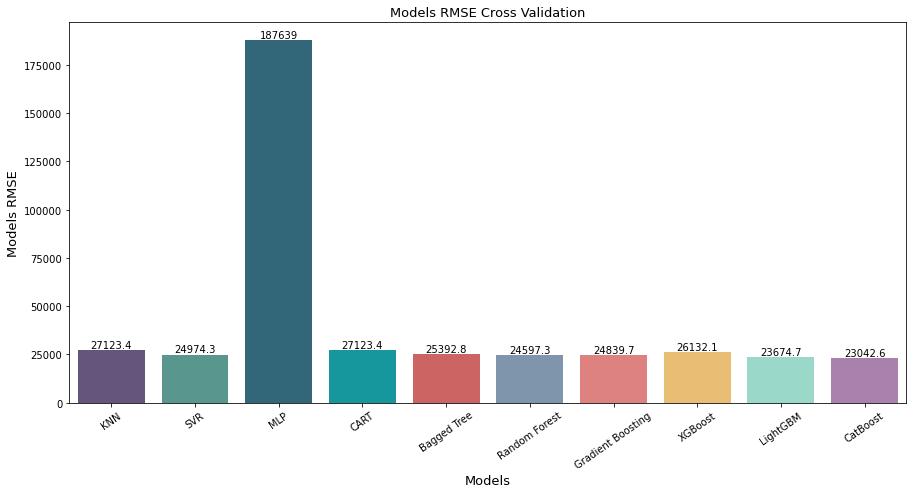

In [59]:
plt.figure(figsize=(15,7))
colors=sns.color_palette(["#624F82","#4FA095","#256D85","#00ABB3","#DD5353","#7895B2","#EC7272","#FEC260","#8FE3CF","#AF7AB3"])
ax=sns.barplot(data=models,x="Model",y="RMSE Cross Validation",palette=colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Models RMSE Cross Validation",size=13)
plt.ylabel("Models RMSE",size=13)
plt.xlabel("Models",size=13)
plt.show()